In [45]:
!ls GlobalLandTemperatures/

GlobalLandTemperaturesByCity.csv      GlobalLandTemperaturesByState.csv
GlobalLandTemperaturesByCountry.csv   GlobalTemperatures.csv
GlobalLandTemperaturesByMajorCity.csv


# Data

Используемый датасет может быть найден здесь:
https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv("GlobalLandTemperatures/GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [49]:
ts = pd.to_datetime(df.dt)
df.index = ts
df.drop('dt', axis=1, inplace=True)

In [50]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01 00:00:00,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-12-01 00:00:00,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01 00:00:00,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01 00:00:00,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01 00:00:00,NaN,NaN,Århus,Denmark,57.05N,10.33E


# Rolling average, max and min

In [104]:
import seaborn as sns
sns.set(rc={"figure.figsize": (10, 6)})
sns.set_style('darkgrid')

In [120]:
def plot_city_average(City):
    
    data = df[df.City == City].AverageTemperature
    pd.rolling_mean(data, 24, freq='A').plot()
    pd.rolling_min(data, 24).plot()
    pd.rolling_max(data, 24).plot()

    plt.title("{0} min, average, max temperature".format(City))
    plt.xlabel("years")
    plt.ylabel("temperature")
    plt.show()

# Let's look at Samara closer

Это почти мой родной город, в котором я провела чудесные 5 лет своей жизни.

Конечно, мне интересно узнать, что там твориться с температурой.

In [150]:
samara_data = df[df.City == "Samara"].dropna()
samara_data = samara_data.ix[:,["AverageTemperature", "AverageTemperatureUncertainty"]]
samara_data.head()

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1743-11-01 00:00:00,-5.329,2.638
1744-04-01 00:00:00,6.813,2.777
1744-05-01 00:00:00,11.984,2.381
1744-06-01 00:00:00,17.955,2.248
1744-07-01 00:00:00,19.547,2.083


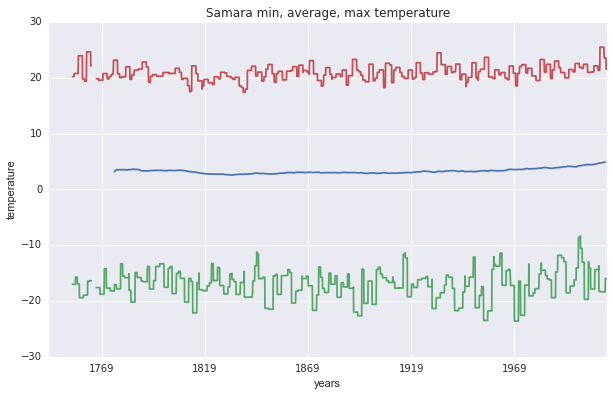

In [151]:
plot_city_average("Samara")

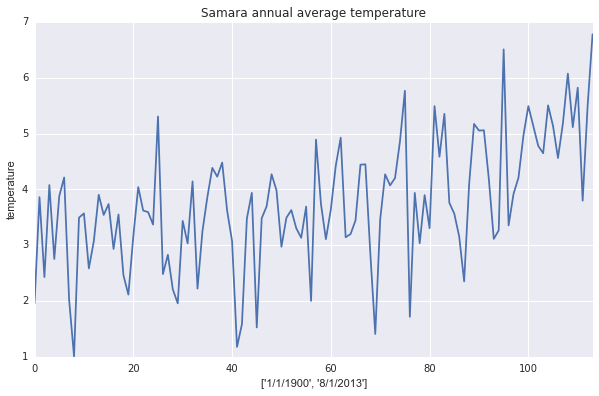

In [152]:
# that's mean we represent the data annualy:
years = ['1/1/1900','8/1/2013']
sns.tsplot(samara_data['1/1/1900':'8/1/2013'].AverageTemperature.resample('A'))

plt.xlabel("{0}".format(years))
plt.ylabel("temperature")
plt.title("Samara annual average temperature")
plt.show()

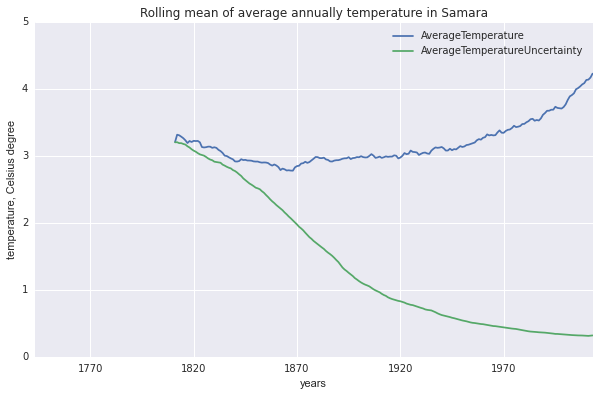

In [157]:
## moving average with 5 year window
## 5 years == 60 months

pd.rolling_mean(samara_data, window = 60, freq='A').plot()
plt.ylim([0,5])
plt.title("Rolling mean of average annually temperature in Samara")
plt.xlabel("years")
plt.ylabel("temperature, Celsius degree")
plt.show()

Кажется тренд все же растет, но нелинейно.

Наверное есть некий переломный момент...

Посмотрим в общем территорию России.


# So.. What about Russian territory?

In [158]:
russian_data = df[df.Country == "Russia"].dropna()
russian_data = russian_data.ix[:, ["AverageTemperature", "AverageTemperatureUncertainty", "City"]]

Посмотрим на табличку с количеством измерений средней температуры для каждого города

In [168]:
stat = russian_data.groupby("City").count()
print "There is data of {0} Russian cities".format(len(stat))
stat.head()

There is data of 156 Russian cities


,AverageTemperature,AverageTemperatureUncertainty
City,,
Abakan,2317,2317
Achinsk,2317,2317
Almetyevsk,3142,3142
Angarsk,2317,2317
Arkhangelsk,3166,3166


Давайте сначала попробуем построить общую статистику по всем имеющимся данным за все годы по всем городам России.
Мы строим скользящее среднее по 2-м годам, предварительно взяв имеющиеся данные по годам.

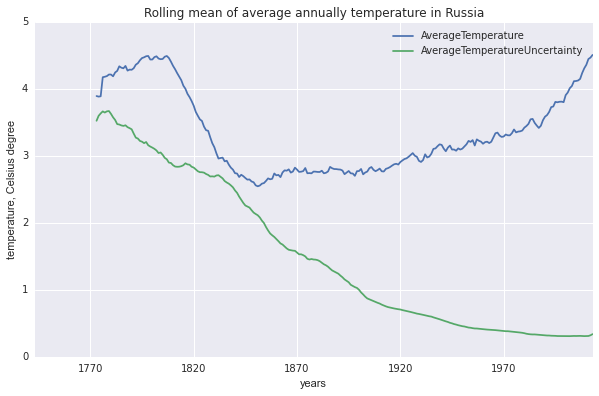

In [172]:
pd.rolling_mean(russian_data, window = 24, freq='A').plot()
plt.ylim([0,5])
plt.title("Rolling mean of average annually temperature in Russia")
plt.xlabel("years")
plt.ylabel("temperature, Celsius degree")
plt.show()

Видно, что наблюдается некий провал температуры примерно с 1820 по 1970, а дальше средняя температура растет.

Также видно, что погрешности измерений с годами уменьшаются, что и понятно.

Попробуем обратить внимание исключительно на южные и северные города России.

In [264]:
south = ["Krasnodar", "Novorossiysk", "Sochi", "Armavir", "Volgograd"]
north = ["Norilsk", "Murmansk", "Kyzyl", "Ust Ilimsk", "Chita"]
north.extend(south)

In [265]:
data = pd.DataFrame()
for city in north:
    data[city] = russian_data[russian_data.City == city].AverageTemperature
data.head()

,Norilsk,Murmansk,Kyzyl,Ust Ilimsk,Chita,Krasnodar,Novorossiysk,Sochi,Armavir,Volgograd
dt,,,,,,,,,,
1820-08-01 00:00:00,8.498,9.800,9.764,11.939,11.116,21.653,21.547,18.828,20.744,19.818
1820-09-01 00:00:00,0.993,5.450,4.631,5.703,5.071,16.768,18.198,15.113,16.057,14.651
1820-10-01 00:00:00,-12.581,-2.493,-6.375,-5.195,-5.520,9.079,11.947,7.779,8.185,6.177
1820-11-01 00:00:00,-23.958,-8.321,-19.326,-16.986,-16.777,4.884,10.198,4.678,3.888,-0.507
1820-12-01 00:00:00,-30.671,-13.274,-30.401,-26.762,-26.441,-0.093,6.930,0.653,-1.074,-6.603


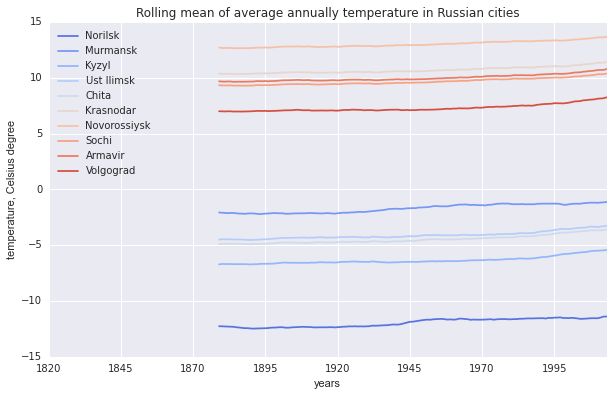

In [268]:
with sns.color_palette("coolwarm", 10):
    pd.rolling_mean(data, window = 60, freq='A').plot()
    plt.title("Rolling mean of average annually temperature in Russian cities")
    plt.xlabel("years")
    plt.ylabel("temperature, Celsius degree")
    plt.show()

### Итак, юг:

In [228]:
# South Russian cities
south = ["Krasnodar", "Novorossiysk", "Sochi", "Armavir", "Volgograd"]

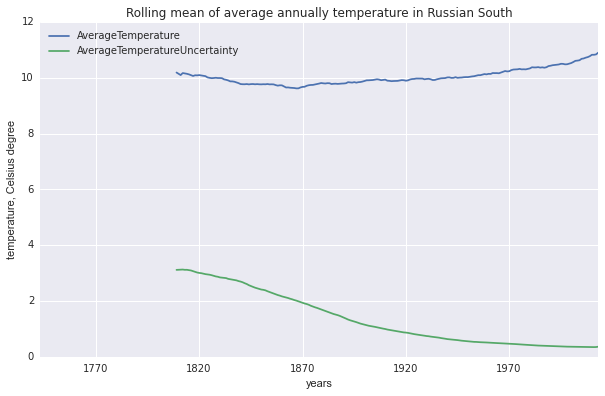

In [267]:
pd.rolling_mean(russian_data[russian_data.City.isin(south)], window = 60, freq='A').plot()
plt.title("Rolling mean of average annually temperature in Russian South")
plt.xlabel("years")
plt.ylabel("temperature, Celsius degree")
plt.show()

Кажется тут общий тренд растет.
Посмотрим, что на севере.
### Итак, север:

In [271]:
north = ["Norilsk", "Murmansk", "Kyzyl", "Ust Ilimsk", "Chita"]

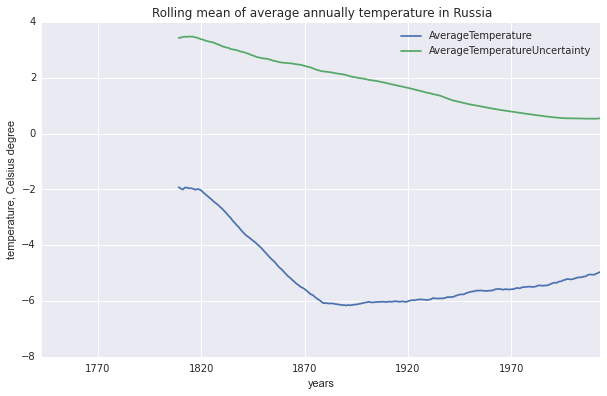

In [272]:
pd.rolling_mean(russian_data[russian_data.City.isin(north)], window = 60, freq='A').plot()
plt.title("Rolling mean of average annually temperature in Russia")
plt.xlabel("years")
plt.ylabel("temperature, Celsius degree")
plt.show()

Тут все как-то не очень понятно..

Кажется что температура таки растет и в северных городах, но только начиная с 1880 года, примерно.

Это даже как-то похоже на то, что происходит на юге, но там тренд не такой резкий.

### Оценим статистику распределения теплых и холодных городов России в выборке

In [269]:
## Так мы получим примерное число холодных городов в выборке

stat = russian_data[russian_data.AverageTemperature <= -26].groupby("City").count()
len(stat[stat.AverageTemperature > 20])

16

In [270]:
## А так получим примерный порядок теплых городов в выборке.
## Напомню, что всего их 156

stat = russian_data[russian_data.AverageTemperature >= 20].groupby("City").count()
len(stat[stat.AverageTemperature > 100])

53

Выходит, что даже с довольно резкими ограничениями на среднюю температуру, количество теплых городов в выборке больше, чем холодных.

Попробуем построить тренд среди избранных теплых и холодных городов.

### South + North

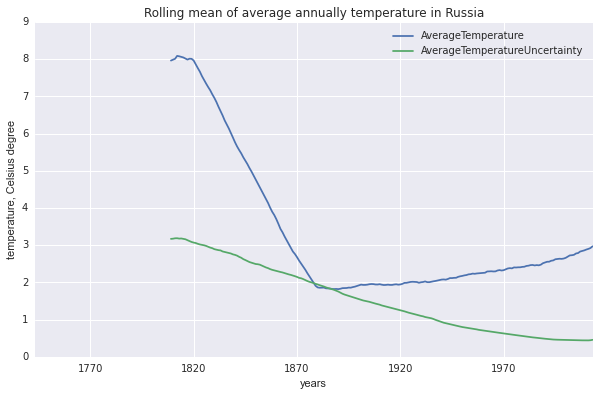

In [273]:
south = ["Krasnodar", "Novorossiysk", "Sochi", "Armavir", "Volgograd"]
north = ["Norilsk", "Murmansk", "Kyzyl", "Ust Ilimsk", "Chita"]
north.extend(south)
pd.rolling_mean(russian_data[russian_data.City.isin(north)], window = 60, freq='A').plot()
plt.title("Rolling mean of average annually temperature in Russia")
plt.xlabel("years")
plt.ylabel("temperature, Celsius degree")
plt.show()

Вывод один -- средняя температура на территории России, конечно, растет, но начиная с 1880 года.

Но это не является катастрофой, т.к. в прошлом средняя температура была сильно выше чем та, что сейчас.

Даже с учетом погрешностей измерений, которые в прошлом, конечно, было сильно выше.